In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score, silhouette_samples
from matplotlib import pyplot as plt
import itertools
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Załadowanie danych

In [2]:
data = pd.read_csv("data_parsed.csv")
data = data[data.columns[1:]]
data_labels = pd.read_csv("online_shoppers_intention.csv")
data_labels = data_labels[data_labels.columns[-1]]

# Przygotowanie modelu

In [3]:
tsnedata = TSNE().fit_transform(data)

model = KMeans(n_clusters=2,random_state=0).fit(data)
result = model.predict(data)

W poprzednim kamieniu milowym doszliśmy do wniosku że model KMeans dla dwóch klastrów daje najlepsze rezultaty, dlatego dalej będziemy analizować właśnie ten model.

# Porównanie z orginalnymi labelami

Zbiór danych zawierał także dodatkową kolumną, która w orginalnym problemie była oznaczeniem głównym - to czy dany klient dokonał zakupu. Jako że nasz model także podzielił dane na dwa klastry, postanowiliśmy porównać ozyskane wyniki z tą właśnie kolumną.

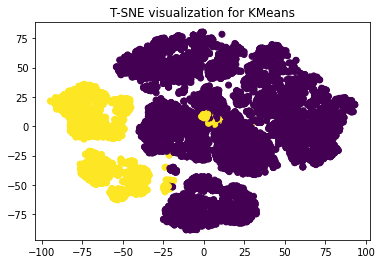

In [4]:
plt.scatter(tsnedata[:,0], tsnedata[:,1], c=result)
plt.title('T-SNE visualization for KMeans')
plt.show()

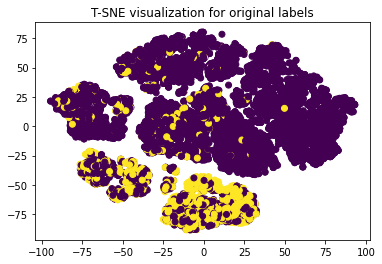

In [5]:
plt.scatter(tsnedata[:,0], tsnedata[:,1], c=data_labels)
plt.title('T-SNE visualization for original labels')
plt.show()

Na wizualizacji porównującej otrzymane przez nas klastry do tych ze zbioru danych widać, że orginalne oznaczenie jest trudne do przewidzenia - wykres zawiera wiele postrzępionych punktów i nie widać żadnych linii podziału.

In [13]:
print("Accuracy: "+str(sum(data_labels == result)/len(data_labels)))

Accuracy: 0.7375506893755069


In [16]:
data = [[0, 0], [0, 0]]
for (k,v) in itertools.product([0,1],[0,1]):
    data[k][v] = sum((data_labels==k) & (result==v))/len(data_labels)
pd.DataFrame(data, columns=["Brak zakupu", "Zakup"])

,Brak zakupu,Zakup
0,0.688646,0.156610
1,0.105839,0.048905


Biorąc pod uwagę brak próby dopasowania klastrów do rzeczywistych oznaczeń, otrzymaliśmy celność znacząco wyższą niż przy losowym oznaczaniu punktów zgodnym z rozkładem oryginalnych danych - widać to ponieważ proporcje braku zakupu do zakupu w obu klastrach są znacząco różne.

# Histogramy

In [9]:
# Funkcje pomocnicze
plotGrid_length = 0
plotGrid_height = 0
plotGrid_count = 0
def initPlotGrid(rowLength, totalPlots, showTicks = False):
    global plotGrid_length, plotGrid_count, plotGrid_height
    plotGrid_length = rowLength
    plotGrid_height = (totalPlots // rowLength) + 1 if totalPlots % rowLength > 0 else totalPlots // rowLength
    plotGrid_count = 0
    
    plt.rcParams['figure.figsize'] = [30, 30/plotGrid_length*plotGrid_height*0.8]
    if(not showTicks):
        plt.rcParams['axes.grid'] = False
        plt.rcParams['xtick.labelsize'] = False
        plt.rcParams['ytick.labelsize'] = False
        plt.rcParams['xtick.top'] = False
        plt.rcParams['xtick.bottom'] = False
        plt.rcParams['ytick.left'] = False
        plt.rcParams['ytick.right'] = False
    
def addToGrid():
    global plotGrid_length, plotGrid_count
    plt.subplot(plotGrid_height, plotGrid_length, plotGrid_count+1)
    plotGrid_count += 1
    
def finalizePlotGrid():
    plt.show()
    plt.style.use('default')


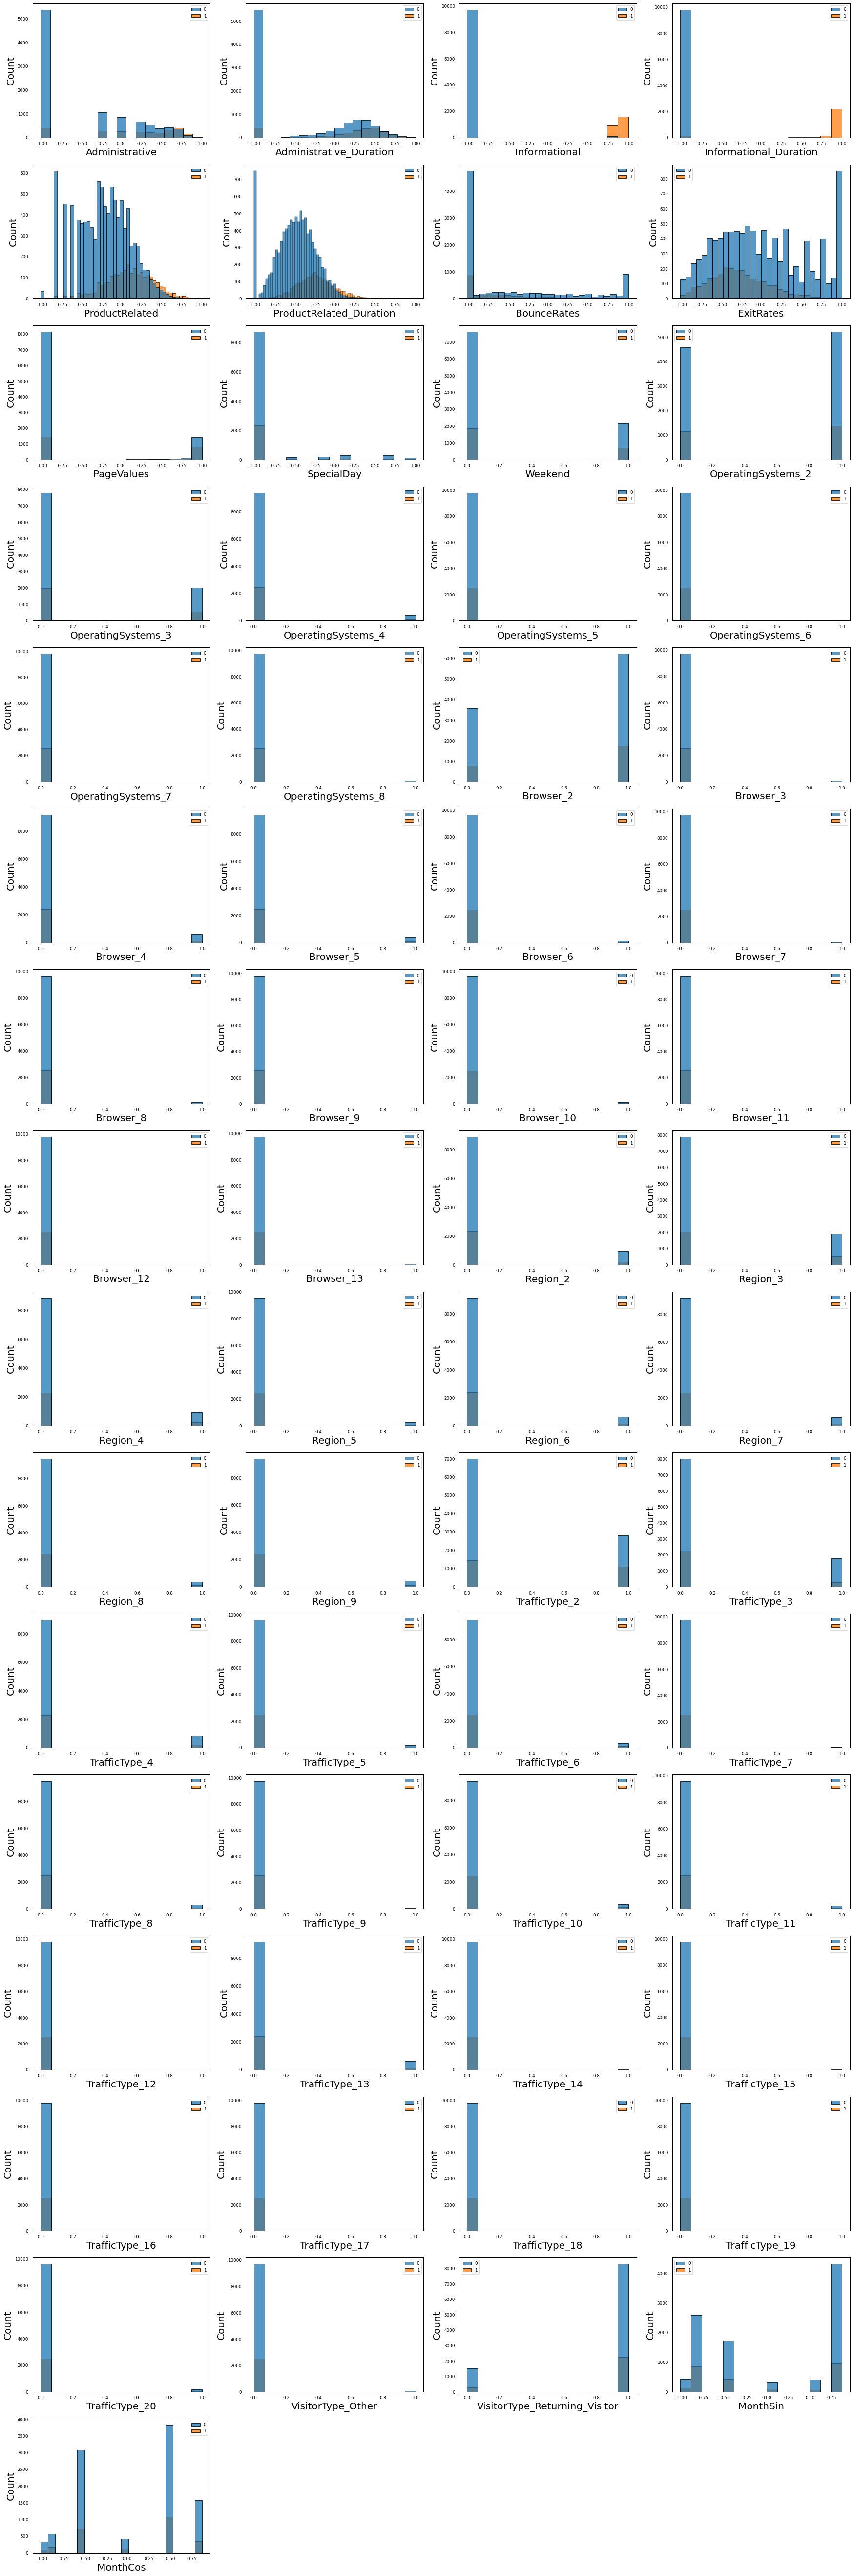

In [10]:
initPlotGrid(4, len(data.columns))
for col in data.columns:
    sns.set_context("paper", rc={"font.size":40,"axes.titlesize":40,"axes.labelsize":20})
    addToGrid()
    sns.histplot(data=data, x=col, hue=result)
    
finalizePlotGrid()

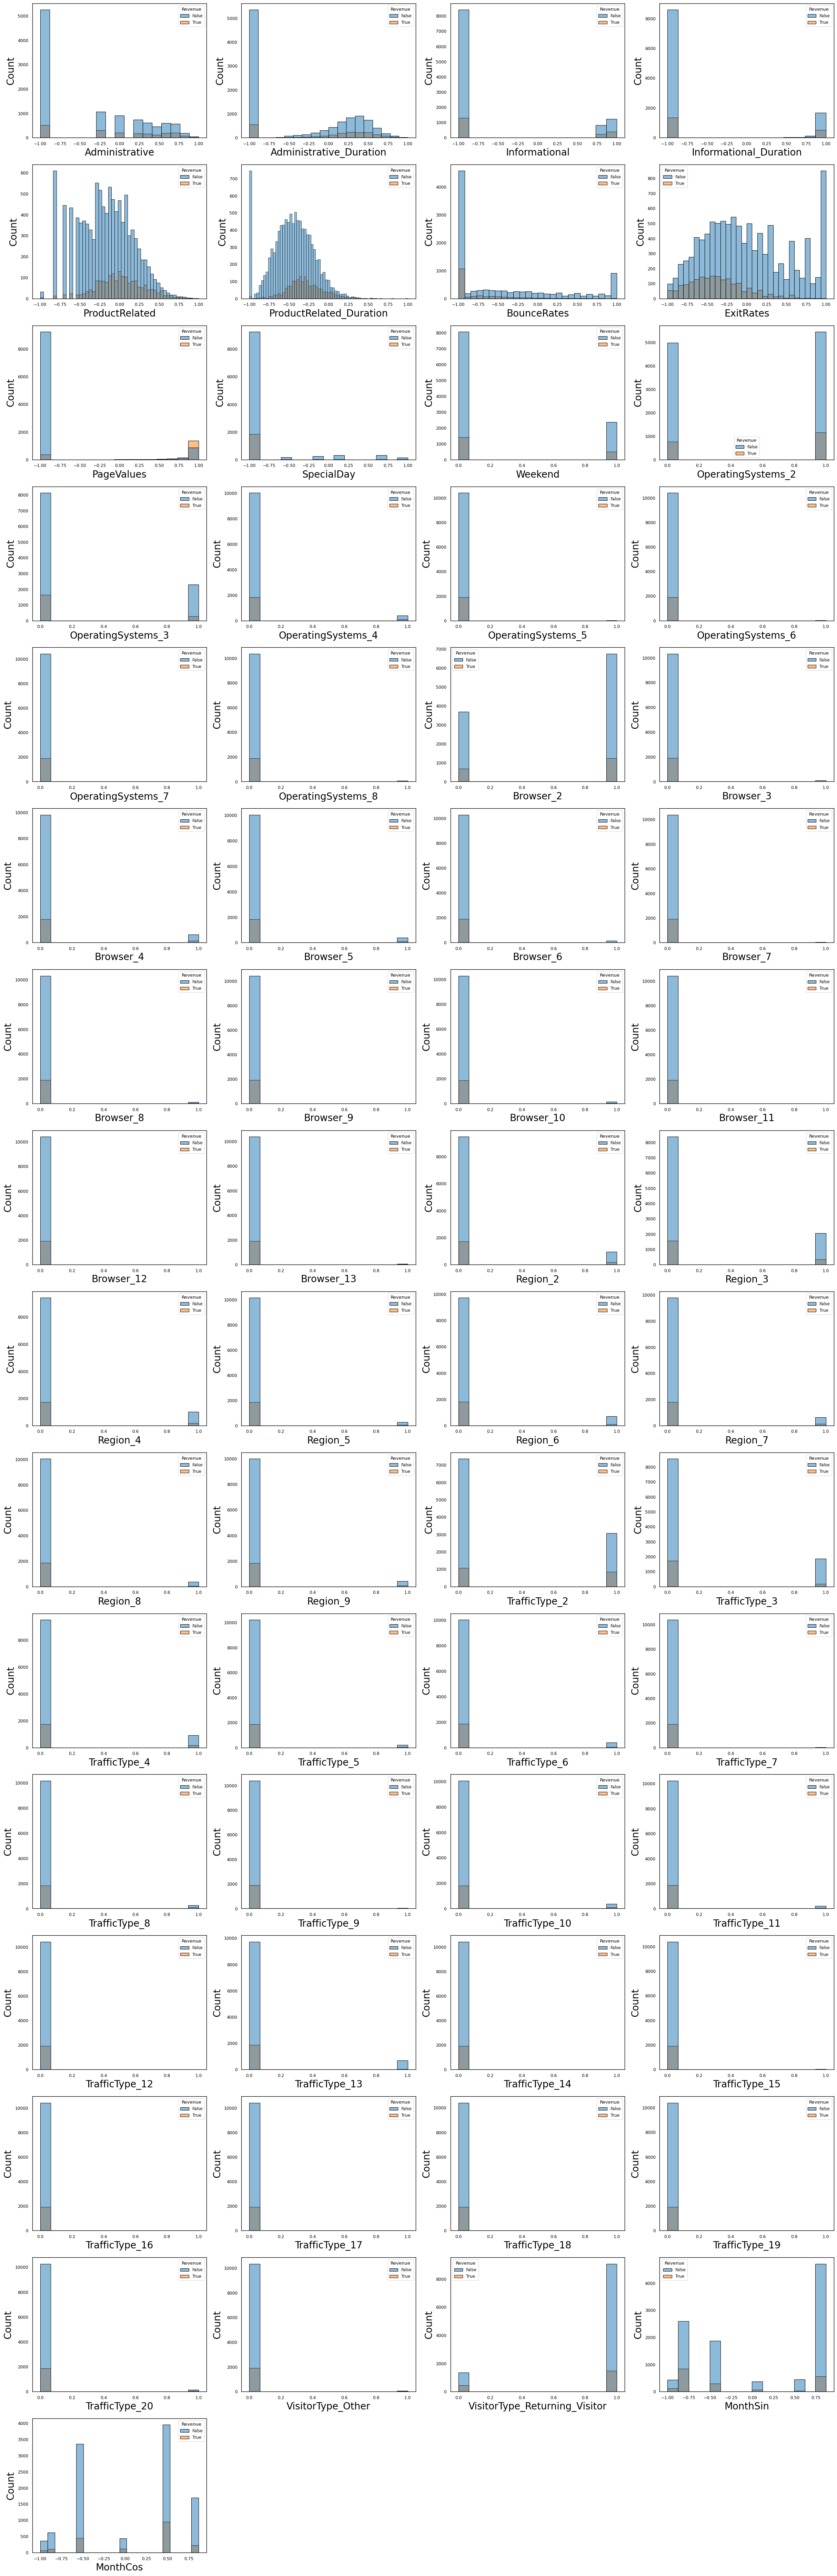

In [11]:
initPlotGrid(4, len(data.columns))
for col in data.columns:
    sns.set_context("paper", rc={"font.size":40,"axes.titlesize":40,"axes.labelsize":20})
    addToGrid()
    sns.histplot(data=data, x=col, hue=data_labels)
    
finalizePlotGrid()

Porównująć powyższe rozkłady, widać że nasz model podzielił klastry w sporej mierze ze względu na zmienne `Informational` oraz `Informational_Duration`. Wynika to z faktu, że pomimo tego, że zmienne są ciągłe, ich najczęściej powtarzające się wartości występują na końcach spektrum w oryginalnym zbiorze danych. Dla porównania, w histogramach orginalnych oznaczeniach znowu nie widać żadnej linii podziału ani własności sugerującej takie właśnie klastrowanie.